In [307]:
import numpy as np
import math
import random 
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import seaborn as sns
sns.set()
import pandas as pd

900
test_len 180
720


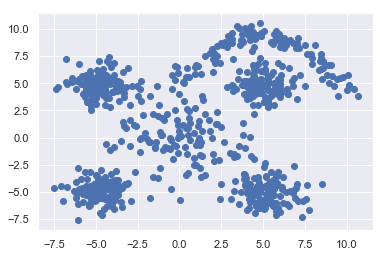

In [308]:

data=pd.read_excel('Workbook1.xlsx')
data.columns=["x_coordinates","y_coordinates"]
x_coords=list(data.x_coordinates)
y_coords=list(data.y_coordinates)
print len(x_coords)
indexes=[5*i for i in range(0,(len(x_coords)/5))]
test_x_coords=[x_coords[i] for i in indexes]
test_y_coords=[y_coords[i] for i in indexes]

file_test=open("test_file.txt","w")
file_test.write("X_values")
file_test.write("\t")
file_test.write("Y_values")
file_test.write("\n")
for i in range(len(test_x_coords)):
    file_test.write(str(test_x_coords[i]))
    file_test.write("\t")
    file_test.write(str(test_y_coords[i]))
    file_test.write("\n")
file_test.close()

test_point_coords=zip(test_x_coords,test_y_coords)
print 'test_len',len(test_x_coords)

for i in sorted(indexes, reverse=True): 
    del x_coords[i]
    del y_coords[i]

points_coordinates=zip(x_coords,y_coords)

print len(points_coordinates)
plt.scatter(x_coords,y_coords)
plt.show()

In [309]:
class point:
    def __init__(self,point,cluster_no):
        self.point=point
        self.cluster_no=cluster_no

class cluster:
    def __init__(self,cluster_no,points):
        self.points=points
        self.cluster_no=cluster_no
        self.centroid=centroid
        
def find_cost(centroids,points_of_all_clusters): #2 nd argument is list of lists  of points
    cost=0
    #print 'len_centroids=',len(centroids)
    #print 'len_cen',len(centroids)
    #print 'len_plts',len(points_of_all_clusters)
    try:
        for i in range(len(centroids)):
            for j in range(len(points_of_all_clusters[i])):
                cost=cost+(points_of_all_clusters[i][j][0]-centroids[i][0])**2 + (points_of_all_clusters[i][j][1]-centroids[i][1])**2
        #print 'i+j=',i+j
    except:
        print "please run again, bad centroid initialization"
        #quit()
        sys.exit()
    return cost
#correct

def find_distance(p1,p2):
    return math.sqrt((p2[0]-p1[0])**2+(p2[1]-p1[1])**2)
#correct

In [326]:
#find_cost([[1,1],[2,2]],[[[2,2],[3,3]],[[2,2],[3,3]]])

In [311]:

def decide_clusters(cluster_centroids,points_coordinates):
    determined_centroids=[]
    for i in range(len(points_coordinates)):
        distances=[find_distance(points_coordinates[i],centroid) for centroid in cluster_centroids]
        min_index=distances.index(min(distances))
        determined_centroids.append(min_index)
        
    return determined_centroids
#correct

def make_centroid_list_for_each_pt(determined_centroids,points_coordinates):
    points_of_all_clusters=[]
    pres_centroid_nums=list(set(determined_centroids))
    indexes_list=[]
    #print 'pres',pres_centroid_nums
    for unique_centroid in pres_centroid_nums:
        each_cluster_list_indexes=[]
        each_cluster_points=[]
        for j in range(len(determined_centroids)):
            if unique_centroid==determined_centroids[j]:
                each_cluster_list_indexes.append(j)
        each_cluster_points=[points_coordinates[i] for i in each_cluster_list_indexes]
        #print 'e',each_cluster_points
        points_of_all_clusters.append(each_cluster_points)
    #print 'cen_lenthdss ',len(pres_centroid_nums)
    #print 'make_cen ',len(points_of_all_clusters)
    return points_of_all_clusters
#correct

def compute_clusters_centroids(points_of_all_clusters):
    cluster_centroid_list=[]
    for each_cluster in points_of_all_clusters:
        cluster_centre=None
        x_coords=[point[0] for point in each_cluster]
        y_coords=[point[1] for point in each_cluster]
        x_mean=sum(x_coords)*1.0/len(x_coords)
        y_mean=sum(y_coords)*1.0/len(y_coords)
        cluster_centroid_list.append([x_mean,y_mean])
    return cluster_centroid_list
#correct            

        

In [327]:
#decide_clusters([[3,3],[4,4]],[[1,1],[5,5],[3.5,3],[4,4]])
#make_centroid_list_for_each_pt([0,1,0,1],[[3,3],[2,2],[4,4],[5,5]])

In [328]:
#compute_clusters_centroids([[[1,1],[3,3]],[[4,4],[6,6]]])

In [314]:
def k_means(no_of_clusters,points_coordinates,epsilon): #pts_crds-> list of lists
    
    cluster_centroids=[[random.uniform(-7,7),random.uniform(-7,7)]for i in range(no_of_clusters)]
    #print cluster_centroids
    #print 'init_centroids=',cluster_centroids
    determined_centroids=decide_clusters(cluster_centroids,points_coordinates)
    points_of_all_clusters=make_centroid_list_for_each_pt(determined_centroids,points_coordinates)
    #print 'balal',points_of_all_clusters[0][3]
    C_new=find_cost(cluster_centroids,points_of_all_clusters)
    #print 'find_cost1',C_new
    new_cluster_centers=None
    C_old=0
    i=0
    num_iter_till_conv=0
    while(abs(C_new-C_old) >= epsilon ) :
        num_iter_till_conv=num_iter_till_conv+1
        #print 'i=',i
        try:
            C_old=C_new
            #print C_old,'C_old'
            determined_centroids=decide_clusters(cluster_centroids,points_coordinates)
            points_of_all_clusters=make_centroid_list_for_each_pt(determined_centroids,points_coordinates)
            cluster_centroids=compute_clusters_centroids(points_of_all_clusters)
            C_new=find_cost(cluster_centroids,points_of_all_clusters)
            #print 'clc',cluster_centroids
            #print 'find_cost=',find_cost(new_cluster_centers,points_of_all_clusters)
            #print C_new,'C_new'
        except:
            print "run again"
            #k_means(no_of_clusters,points_coordinates,epsilon)
           
    return cluster_centroids,points_of_all_clusters,C_new,determined_centroids,num_iter_till_conv

In [329]:
#output=k_means(4,points_coordinates,0.0001)
#print 'centeres=',output[0]
#print 'cost=',output[2]

2
3
4
5
6
7
8
9
10


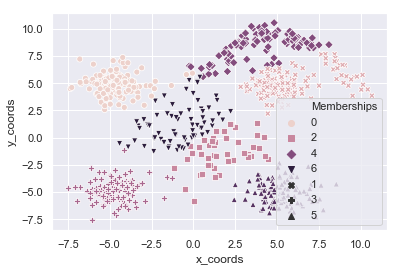

In [316]:
costs_list=[]
k_means_op_list=[]
iter_till_conv_list=[]
for k in range(2,11):
    print k 
    k_means_op_list.append(k_means(k,points_coordinates,0.001))
    c_k=k_means_op_list[-1][2]
    iter_till_conv_list.append(k_means_op_list[-1][4])
    costs_list.append(c_k)

r_k_list=[]
for i in range(len(costs_list)):
    if i>0 and i<8:
        r_k_list.append(abs((costs_list[i]-costs_list[i+1])/(costs_list[i-1]-costs_list[i])))

        
best_num_clusters=r_k_list.index(min(r_k_list))+3

file_output=open("output_file.txt","w")
file_output.write("X_values")
file_output.write("\t")
file_output.write("Y_values")
file_output.write("\t")
file_output.write("Cluster_no")
file_output.write("\n")
for i in range(len(k_means_op_list[best_num_clusters][3])):
    file_output.write(str(x_coords[i]))
    file_output.write("\t")
    file_output.write(str(y_coords[i]))
    file_output.write("\t")
    file_output.write(str(k_means_op_list[best_num_clusters][3][i]))
    file_output.write("\n")
file_output.close()

data_to_plot=pd.read_csv("output_file.txt",sep='\t')
#print data_to_plot.head
data_to_plot.columns=["x_coords","y_coords","Memberships"]

try:
    sns.scatterplot( data=data_to_plot,x='x_coords', y ="y_coords", hue="Memberships", style="Memberships")
    #plt.show()
    plt.savefig("data_set_clusters_image.png")
except:
    print 'please run again, bad initilizations'

    

In [317]:
file_output=open("output_file.txt","w")
file_output.write("X_values")
file_output.write("\t")
file_output.write("Y_values")
file_output.write("\t")
file_output.write("Cluster_no")
file_output.write("\n")
for i in range(len(x_coords)):
    file_output.write(str(x_coords[i]))
    file_output.write("\t")
    file_output.write(str(y_coords[i]))
    file_output.write("\t")
    file_output.write(str(k_means_op_list[best_num_clusters][3][i]))
    file_output.write("\n")
file_output.close()


In [318]:
set_of_clusters_op=k_means_op_list[best_num_clusters][0]
set_of_clusters_nums=list(set(k_means_op_list[best_num_clusters][3]))
print set_of_clusters_nums
print set_of_clusters_op

[0, 1, 2, 3, 4, 5, 6]
[[-4.632582031249999, 4.87937765625], [5.82545268065268, 4.979794965034967], [1.713171111111111, -1.3439555555555553], [-4.725949593495933, -4.81750406504065], [4.051431501831502, 8.43680197802198], [5.155783333333333, -5.029695833333334], [-0.8059600000000001, 1.264687285714286]]


In [319]:
file_output_c_centers=open("centroid_info.txt","w")
file_output_c_centers.write("X_values")
file_output_c_centers.write("\t")
file_output_c_centers.write("Y_values")
file_output_c_centers.write("\n")
for i in range(len(set_of_clusters_op)):
    file_output_c_centers.write(str(set_of_clusters_op[i][0]))
    file_output_c_centers.write("\t")
    file_output_c_centers.write(str(set_of_clusters_op[i][1]))
    file_output_c_centers.write("\n")
file_output_c_centers.close()

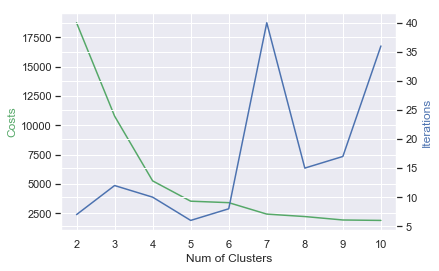

In [330]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(k_list,costs_list, 'g-')
ax2.plot(k_list,iter_till_conv_list, 'b-')

ax1.set_xlabel('Num of Clusters')
ax1.set_ylabel('Costs', color='g')
ax2.set_ylabel('Iterations', color='b')

#plt.show()
plt.savefig("cost_and_iter_vs_k.png")

In [321]:
#fp=open("text_file.txt","w")

In [322]:
data2=pd.read_csv('centroid_info.txt',sep="\t")
data2.columns=["centroid_x_coord","centroid_y_coord"]

cen_x_coords=list(data2.centroid_x_coord)
cen_y_coords=list(data2.centroid_y_coord)
centroid_locations=zip(cen_x_coords,cen_y_coords)

data_test=pd.read_csv('test_file.txt',sep="\t")
data_test.columns=["test_x_coords","test_y_coords"]

test_x_coords=list(data_test.test_x_coords)
test_y_coords=list(data_test.test_y_coords)
test_coords=zip(test_x_coords,test_y_coords)


In [323]:
memberships_list=decide_clusters(centroid_locations,test_coords)

In [324]:
file_output_test=open("test_data_output_file.txt","w")
file_output_test.write("X_values")
file_output_test.write("\t")
file_output_test.write("Y_values")
file_output_test.write("\t")
file_output_test.write("Cluster_no")
file_output_test.write("\n")
for i in range(len(test_x_coords)):
    file_output_test.write(str(test_x_coords[i]))
    file_output_test.write("\t")
    file_output_test.write(str(test_y_coords[i]))
    file_output_test.write("\t")
    file_output_test.write(str(memberships_list[i]))
    file_output_test.write("\n")
file_output_test.close()

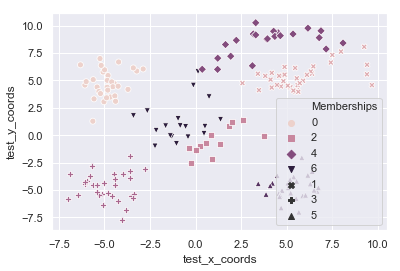

In [325]:

data_test['Memberships']=memberships_list
sns.scatterplot(data=data_test, x="test_x_coords", y ="test_y_coords", hue="Memberships", style="Memberships")
#plt.show()
plt.savefig("test_data_set_clusters_image.png")

In [286]:
#testing here onwards